In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/content/drive/MyDrive/day48-Linear-regression/placement.csv')

In [6]:
print(df.shape)
df.head()

(200, 2)


,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package(in lpa)')

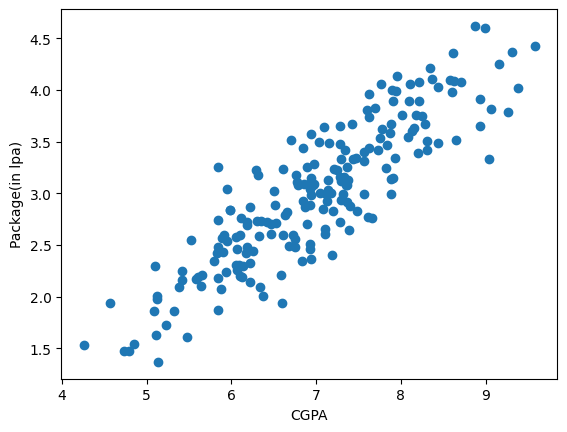

In [7]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [8]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr = LinearRegression()

In [13]:
lr.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'Package(in lpa)')

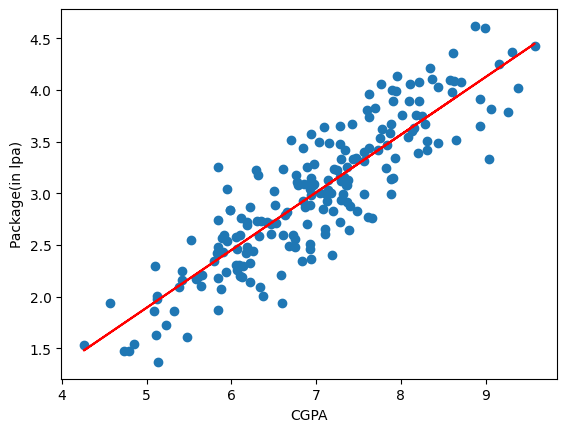

In [14]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

### Regression Metrics

In [15]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [16]:
y_pred = lr.predict(X_test)

`MAE` - Mean Absolute Error

In [18]:
print("MAE =",mean_absolute_error(y_test,y_pred))

MAE = 0.2884710931878175


`MSE` - Mean Squared Error

In [19]:
print("MSE =",mean_squared_error(y_test,y_pred))

MSE = 0.12129235313495527


`RMSE` - Root Mean Squared Error

In [20]:
print("RMSE =", np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE = 0.34827051717731616


In [22]:
print("MSE =", r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

MSE = 0.780730147510384


### Adjusted R2 Score

In [23]:
X_test.shape

(40, 1)

In [24]:
1 - ((1-r2)*(40-1))/(40-1-1)

0.7749598882343415

When we add irrelevant column named `random_feature`

In [26]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.377962,3.26
1,5.12,0.514192,1.98
2,7.82,0.903430,3.25
3,7.42,0.631831,3.67
4,6.94,0.560559,3.57


Text(0, 0.5, 'Package(in lpa)')

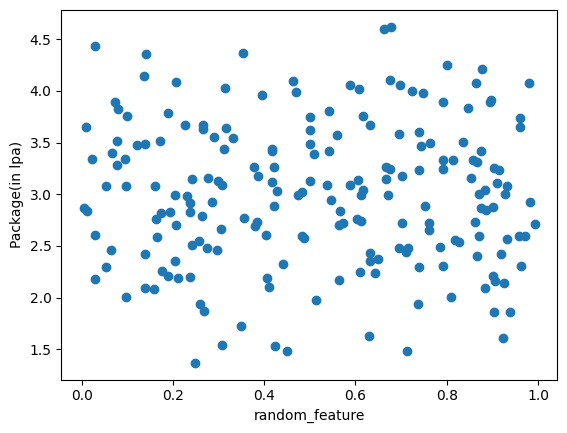

In [27]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [28]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [30]:
lr = LinearRegression()

In [31]:
lr.fit(X_train,y_train)

LinearRegression()

In [32]:
y_pred = lr.predict(X_test)

In [33]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7802182801908353


In [34]:
adj_r2 = 1 - ((1-r2)*(40-1)/(40-1-2))
print("Adj R2 score =", adj_r2)

Adj R2 score = 0.7683381872281777


When we add a relevant column named `iq`

In [35]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [36]:
new_df2.sample(5)

,cgpa,iq,package
135,6.10,2.90,2.60
92,7.90,4.80,4.00
150,6.30,2.53,2.73
170,6.22,3.77,2.87
195,6.93,2.16,2.46


Text(0, 0.5, 'Package(in lpa)')

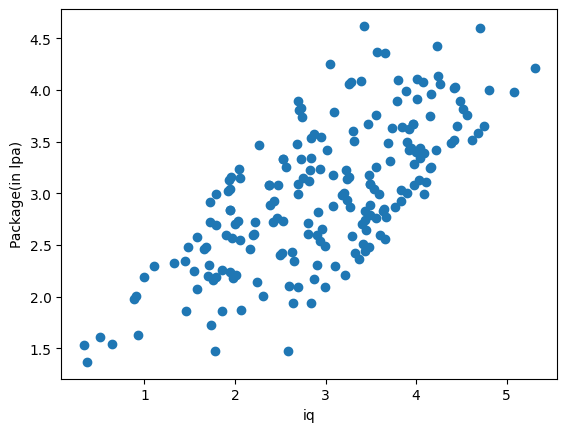

In [37]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [38]:
np.random.randint(-100,100)

-94

In [39]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [41]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [42]:
print("R2 score =",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score = 0.7993565253961232


In [43]:
#adjusted r2 score
adj_r2 = 1 - ((1-r2)*(40-1)/(40-1-2))
print("Adj R2 Score =", adj_r2)

Adj R2 Score = 0.788510932174292
